In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
df=pd.read_csv("final_train_data.csv",index_col=[0])
df_test=pd.read_csv("final_test_data.csv", index_col=[0])

In [2]:
df.shape, df_test.shape

((188, 5), (188, 5))

In [3]:
df.head()

,close_price,high_price,low_price,open_price,transaction_volume
index,,,,,
0,115.809998,0.410603,0.413668,0.406604,0.019716
1,116.790001,0.409756,0.408433,0.402003,0.015952
2,113.019997,0.411040,0.415036,0.410287,0.014670
3,116.500000,0.415879,0.414589,0.406617,0.017796
4,113.160004,0.424067,0.427210,0.420419,0.022921


In [4]:
df.tail()

,close_price,high_price,low_price,open_price,transaction_volume
index,,,,,
183,133.699997,0.602549,0.586086,0.575748,0.022602
184,133.410004,0.614523,0.600996,0.593604,0.020209
185,133.110001,0.630270,0.629532,0.629642,0.018550
186,134.779999,0.630216,0.633944,0.627123,0.013391
187,136.330002,0.640878,0.634223,0.622960,0.019224


In [5]:
df_test.head()

,close_price,high_price,low_price,open_price,transaction_volume
index,,,,,
0,136.330002,0.640878,0.634223,0.622960,0.019224
1,136.960007,0.643393,0.646565,0.644047,0.015646
2,137.270004,0.630544,0.626405,0.618031,0.019499
3,139.960007,0.637542,0.633832,0.623618,0.014315
4,142.020004,0.634644,0.626572,0.633422,0.021760


In [6]:
df_test.tail()

,close_price,high_price,low_price,open_price,transaction_volume
index,,,,,
183,165.380005,0.734158,0.743733,0.732392,0.008113
184,168.820007,0.735907,0.742057,0.736116,0.009258
185,170.210007,0.731806,0.741387,0.730694,0.009537
186,174.070007,0.739243,0.744403,0.730420,0.008369
187,174.720001,0.746023,0.749987,0.738033,0.008698


In [7]:
df_for_training = df
df_for_testing = df_test
print(df_for_training.shape)
print(df_for_testing.shape)

(188, 5)
(188, 5)


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled = scaler.transform(df_for_testing)

In [9]:
def createXY(dataset, n_past): 
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
        dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
        dataY.append(dataset[i,0]) # 用第0相作为label TODO：改为close price所在
    return np.array(dataX), np.array(dataY) 

trainX, trainY = createXY(df_for_training_scaled, 10) # 取过去10天的数据作为features
testX, testY = createXY(df_for_testing_scaled, 10)

In [10]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(10,5)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse', optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model, verbose=1, validation_data=(testX, testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [100,100],
              'optimizer' : ['adam','Adadelta'] }

grid_search = GridSearchCV(estimator = grid_model, param_grid = parameters, 
                           cv = 2, n_jobs = -1)

/Users/lucky/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


In [11]:
grid_search = grid_search.fit(trainX, trainY)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/12 [========================>.....] - ETA: 0s - loss: 0.0943WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe75b300050> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full ou

12/12 [==============================] - 0s 12ms/step - loss: 0.0073 - val_loss: 0.0478
Epoch 64/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.0371
Epoch 65/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0085 - val_loss: 0.0460
Epoch 66/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0081 - val_loss: 0.0154
Epoch 67/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0086 - val_loss: 0.0142
Epoch 68/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0079 - val_loss: 0.0312
Epoch 69/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0077 - val_loss: 0.0285
Epoch 70/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0075 - val_loss: 0.0104
Epoch 71/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0090 - val_loss: 0.0549
Epoch 72/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0092 - val_loss: 0.0568
Epo

In [12]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 100, 'optimizer': 'adam'}

In [13]:
my_model = grid_search.best_estimator_.model
prediction = my_model.predict(testX)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [14]:
prediction_copies_array = np.repeat(prediction, 5, axis=-1)
pred = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),5)))[:,0]

In [15]:
original_copies_array = np.repeat(testY, 5, axis=-1)
original = scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),5)))[:,0]

In [16]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [142.57167 146.84152 148.73325 146.82523 142.89114 144.01442 145.26973
 146.69896 148.68922 149.27913 147.62224 144.94664 144.68503 144.92546
 145.887   147.41307 146.84488 146.18564 145.36613 144.66841 144.78198
 145.49156 147.86763 149.1123  150.47853 150.18994 147.00793 146.12543
 147.45924 149.07439 150.03151 149.48822 148.38937 147.19652 150.70815
 151.86137 152.04498 152.5699  153.06235 154.97356 154.12036 153.4395
 149.45508 148.63051 147.2358  148.41162 149.01205 146.21526 144.03595
 143.03209 145.29051 147.47249 147.32281 145.85185 143.26154 143.05565
 142.55048 143.76613 141.80522 142.2028  143.01717 144.23296 144.43715
 144.11436 142.93742 141.93538 143.77068 145.50912 146.87932 148.64818
 148.85666 149.17966 148.16801 148.0117  148.7451  149.70967 152.55122
 151.1297  149.34355 149.59296 151.2482  151.60765 151.8858  151.46637
 151.5443  149.39656 148.59465 150.39073 151.36284 152.00304 153.4882
 157.56192 159.85739 159.47345 159.33067 159.16171 154.75352 155

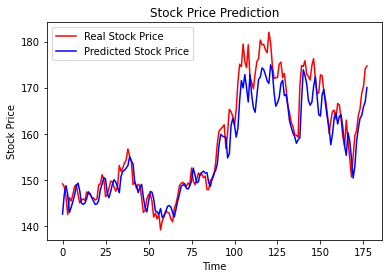

In [17]:
import matplotlib.pyplot as plt
plt.plot(original, color = 'red', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
import math
def computeCorrelation(X, Y):
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0 , len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX +=  diffXXBar**2
        varY += diffYYBar**2
    
    SST = math.sqrt(varX * varY)
    
    print ("R-Squared:", (SSR / SST)**2)

computeCorrelation(pred, original)

R-Squared: 0.9387446566775315
